In [1]:
%matplotlib notebook

import tensorflow as tf
import numpy as np
import time

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_circles

In [2]:
N=210
K=2
# Maximum number of iterations, if the conditions are not met
MAX_ITERS = 1000
cut=int(N*0.7)

In [3]:
start = time.time()
# kita bagi data training 70% sisanya data testing
data, features = make_circles(n_samples=N, shuffle=True, noise= 0.12, factor=0.4)
tr_data, tr_features= data[:cut], features[:cut]
te_data,te_features=data[cut:], features[cut:]

<IPython.core.display.Javascript object>


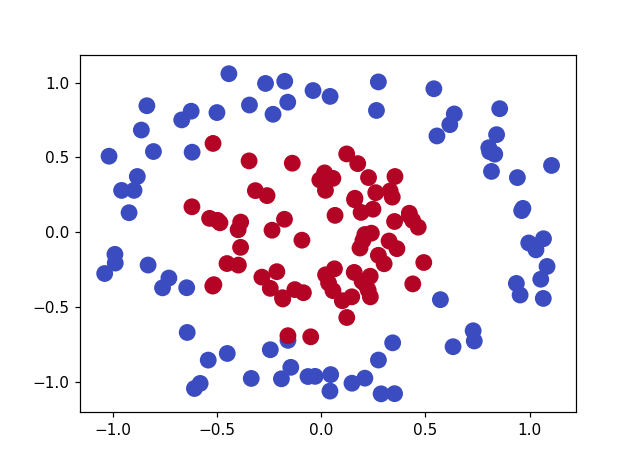

[]

In [5]:
fig, ax = plt.subplots()
ax.scatter(tr_data.transpose()[0], tr_data.transpose()[1], marker = 'o', s = 100, c = tr_features, cmap=plt.cm.coolwarm )
plt.plot()

In [6]:
# sama kayak kmeans, data yang berisi koordinat kita masukkan ke variabel points
points=tf.Variable(data)
cluster_assignments = tf.Variable(tf.zeros([N], dtype=tf.int64))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# bikin session untuk menjalankan tensorflow
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Instructions for updating:
Use `tf.math.argmin` instead
[1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]


<IPython.core.display.Javascript object>


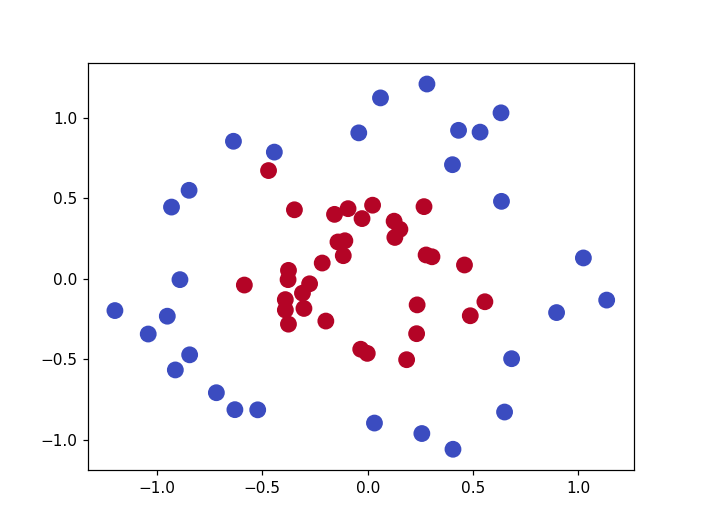

[]

In [11]:
# untuk menyimpan hasil dari pengelompokan
test=[]

for i, j in zip(te_data, te_features):
#     reduce sum ini maksute dalam satu baris dijumlah 
    distances = tf.reduce_sum(tf.square(tf.subtract(i , tr_data)),reduction_indices=1)
    neighbor = tf.arg_min(distances,0)
    
    #print tr_features[sess.run(neighbor)]
    #print j
    test.append(tr_features[sess.run(neighbor)])
print (test)
fig, ax = plt.subplots()
ax.scatter(te_data.transpose()[0], te_data.transpose()[1], marker = 'o', s = 100, c = test, cmap=plt.cm.coolwarm )
plt.plot()

In [12]:

end = time.time()
print ("Found in %.2f seconds" % (end-start))
print ("Cluster assignments:", test)

Found in 440.72 seconds
Cluster assignments: [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]
